In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import datetime
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error

In [2]:
training_data = pd.read_csv("organized_data_training.csv")

In [3]:
training_data_array = training_data.values

In [4]:
train_x = training_data_array[:, 4:7]
train_y = training_data_array[:,-1:]

In [5]:
# tt = train_x[:2]
# print(tt)

In [6]:
# print(tt[0][0])

In [7]:
# w_temp = np.array([[1,1,1]])
# ttt = w_temp @ tt.T
# print(np.tanh(ttt))

In [8]:
w_array = np.array([0,0,0])


In [9]:
# print(train_x[0])

In [10]:
# print(y_predict.shape)

In [11]:
# print(1 - y_predict[i]**2)

In [12]:
# print((1) * (1 - y_predict[i]**2) * train_x[i][0])

In [13]:
# w_array = np.array([1,1,1])

In [14]:
# print(w_array.shape)

In [15]:
# print(np.dot(w_array,train_x[0].T))

In [16]:
# print(train_x[:2].T)

In [17]:
# print(w_array@(train_x[:2].T))

In [18]:
def forward(w_array, x_array):
    temp = w_array @ x_array.T
    tanh_array = np.tanh(temp)
    return tanh_array

In [19]:
def calculate_gradient_descent(y_predict,y_true,w_array,x_array):
    gradients = []
    term1 = 0
    term2 = 0
    term3 = 0
    for i in range(len(y_predict)):
        temp1 = float((y_predict[i] - y_true[i]) * (1 - y_predict[i]**2) * x_array[i][0])
        temp2 = float((y_predict[i] - y_true[i]) * (1 - y_predict[i]**2) * x_array[i][1])
        temp3 = float((y_predict[i] - y_true[i]) * (1 - y_predict[i]**2) * x_array[i][2])
        term1 += temp1
        term2 += temp2
        term3 += temp3
    gradients = np.array([term1,term2,term3])
    return gradients

In [20]:
def update_gradient(gradients, w_array, lr):
    w_array = w_array - lr*gradients
    return w_array

In [21]:
# y_predict = forward(w_array, train_x)
# print(y_predict)

In [22]:
for i in range(4):
    y_predict = forward(w_array, train_x)
    gradients = calculate_gradient_descent(y_predict,train_y,w_array,train_x)
    w_array = update_gradient(gradients, w_array, 0.0001)
    y_predict = y_predict.reshape(len(y_predict),1)
    print("MSE:", mean_squared_error(train_y, y_predict))

MSE: 0.011184211323846411
MSE: 0.008108531508843815
MSE: 0.007200051429030543
MSE: 0.006882110372792572


In [23]:
y_predict =y_predict.reshape(len(y_predict),1)
print(y_predict.shape)

(196926, 1)


In [ ]:
print(train_y-y_predict)

In [24]:
test_data = pd.read_csv("HW4_Test_Data.csv")

In [25]:
size = len(test_data)
random_data = np.random.rand(size, 3)
time_splited_data = pd.DataFrame(random_data, columns=[ 'day_of_week', 'hour_of_day',"normalized_energy"])
for i in range(len(test_data)):
    temp = test_data.loc[i]
    date_string = temp["TestTime"]
    date_obj = datetime.datetime.strptime(date_string, '%m/%d/%y %H:%M')
    day_of_week = date_obj.weekday()
    hour_of_day = date_obj.hour
    value = test_data.loc[i,"TestBldg"]
    time_splited_data.loc[i] = [day_of_week,hour_of_day, value ]

In [26]:
sorted_time_splited_data = time_splited_data.sort_values(by=['day_of_week', 'hour_of_day'], ascending=[True,True])

In [28]:
sorted_time_splited_data = sorted_time_splited_data.reset_index(drop=True)
sorted_time_splited_data

,day_of_week,hour_of_day,normalized_energy
0,0.0,0.0,0.188552
1,0.0,1.0,0.084175
2,0.0,2.0,0.057239
3,0.0,3.0,0.040404
4,0.0,4.0,0.040404
...,...,...,...
163,6.0,19.0,0.094276
164,6.0,20.0,0.151515
165,6.0,21.0,0.175084
166,6.0,22.0,0.151515


In [29]:
average_energy = pd.Series([0 for i in range(len(sorted_time_splited_data))])
sorted_time_splited_data = sorted_time_splited_data.assign(average_energy=average_energy)

In [30]:
data = pd.read_csv("HW4_Train_Data.csv")

In [31]:
size = len(data) * 18
random_data = np.random.rand(size, 5)

# Create a pandas DataFrame from the numpy array
organized_data = pd.DataFrame(random_data, columns=['Building_index', 'week_of_year', 'day_of_week', 'hour_of_day',"normalized_energy"])
index = 0

build_max_consumption = []
for i in range(19):
    if i == 5:
        build_max_consumption.append(None)
    if i != 5:
        build_max_consumption.append(np.max(data["Bldg%d (kWh)"%(i+1)]))

for i in range(len(data)):
    temp = data.loc[i]
    date_string = temp["Start Time (GMT-0800,PST)"]
    date_obj = datetime.datetime.strptime(date_string, '%m/%d/%y %H:%M')
    week_of_year = date_obj.isocalendar()[1]
    day_of_week = date_obj.weekday()
    hour_of_day = date_obj.hour
    for j in range(19):
        if j != 5:
            value = temp["Bldg%d (kWh)"%(j+1)] / build_max_consumption[j]
            organized_data.loc[index] = [(j+1), week_of_year, day_of_week,hour_of_day, value ]
            index += 1
print(organized_data)

        Building_index  week_of_year  day_of_week  hour_of_day  \
0                  1.0           1.0          6.0          0.0   
1                  2.0           1.0          6.0          0.0   
2                  3.0           1.0          6.0          0.0   
3                  4.0           1.0          6.0          0.0   
4                  5.0           1.0          6.0          0.0   
...                ...           ...          ...          ...   
154219            15.0          52.0          5.0         23.0   
154220            16.0          52.0          5.0         23.0   
154221            17.0          52.0          5.0         23.0   
154222            18.0          52.0          5.0         23.0   
154223            19.0          52.0          5.0         23.0   

        normalized_energy  
0                0.234568  
1                0.082343  
2                0.021277  
3                0.006536  
4                0.393939  
...                   ...  
154219     

In [32]:
grouped_by_hour = organized_data.groupby(["day_of_week",'hour_of_day'])['normalized_energy'].mean()
print(grouped_by_hour)

day_of_week  hour_of_day
0.0          0.0            0.114915
             1.0            0.094641
             2.0            0.081565
             3.0            0.071879
             4.0            0.073287
                              ...   
6.0          19.0           0.159804
             20.0           0.174154
             21.0           0.181300
             22.0           0.162057
             23.0           0.144639
Name: normalized_energy, Length: 168, dtype: float64


In [33]:
for i in range(len(sorted_time_splited_data)):
    sorted_time_splited_data.loc[i,"average_energy"]=grouped_by_hour[sorted_time_splited_data.loc[i,"day_of_week"]][sorted_time_splited_data.loc[i,"hour_of_day"]]

In [34]:
s1 = pd.Series([0, 0, 0])
t_3 = pd.concat([s1, sorted_time_splited_data["normalized_energy"][3:]])
s1 = pd.Series([0, 0])
t_2 = pd.concat([s1, sorted_time_splited_data["normalized_energy"][2:]])
s1 = pd.Series([0])
t_1 = pd.concat([s1, sorted_time_splited_data["normalized_energy"][1:]])


In [35]:
sorted_time_splited_data = sorted_time_splited_data.assign(t_3=t_3)
sorted_time_splited_data = sorted_time_splited_data.assign(t_2=t_2)
sorted_time_splited_data = sorted_time_splited_data.assign(t_1=t_1)


In [36]:
print(len(sorted_time_splited_data))

168


In [39]:
sorted_time_splited_data = sorted_time_splited_data[3:]
sorted_time_splited_data = sorted_time_splited_data.reset_index(drop=True)

In [40]:
sorted_time_splited_data["true_value"] = sorted_time_splited_data["normalized_energy"] - sorted_time_splited_data["average_energy"]

In [41]:
sorted_time_splited_data

,day_of_week,hour_of_day,normalized_energy,average_energy,t_3,t_2,t_1,true_value
0,0.0,3.0,0.040404,0.071879,0.040404,0.040404,0.040404,-0.031475
1,0.0,4.0,0.040404,0.073287,0.040404,0.040404,0.040404,-0.032883
2,0.0,5.0,0.067340,0.076234,0.067340,0.067340,0.067340,-0.008894
3,0.0,6.0,0.313131,0.109249,0.313131,0.313131,0.313131,0.203882
4,0.0,7.0,0.158249,0.108510,0.158249,0.158249,0.158249,0.049739
...,...,...,...,...,...,...,...,...
160,6.0,19.0,0.094276,0.159804,0.094276,0.094276,0.094276,-0.065528
161,6.0,20.0,0.151515,0.174154,0.151515,0.151515,0.151515,-0.022639
162,6.0,21.0,0.175084,0.181300,0.175084,0.175084,0.175084,-0.006216
163,6.0,22.0,0.151515,0.162057,0.151515,0.151515,0.151515,-0.010541


In [42]:
test_data_array = sorted_time_splited_data.values
test_x = test_data_array[:, 4:7]
test_y = test_data_array[:,-1:]

In [43]:
y_predict_test = forward(w_array, test_x)


In [44]:
print(mean_squared_error(test_y, y_predict_test))

0.0057038339491440205


In [45]:
predict_energy = pd.Series(y_predict_test)
sorted_time_splited_data = sorted_time_splited_data.assign(predict_energy=predict_energy)

In [46]:
sorted_time_splited_data

,day_of_week,hour_of_day,normalized_energy,average_energy,t_3,t_2,t_1,true_value,predict_energy
0,0.0,3.0,0.040404,0.071879,0.040404,0.040404,0.040404,-0.031475,0.026380
1,0.0,4.0,0.040404,0.073287,0.040404,0.040404,0.040404,-0.032883,0.026380
2,0.0,5.0,0.067340,0.076234,0.067340,0.067340,0.067340,-0.008894,0.043949
3,0.0,6.0,0.313131,0.109249,0.313131,0.313131,0.313131,0.203882,0.201692
4,0.0,7.0,0.158249,0.108510,0.158249,0.158249,0.158249,0.049739,0.102981
...,...,...,...,...,...,...,...,...,...
160,6.0,19.0,0.094276,0.159804,0.094276,0.094276,0.094276,-0.065528,0.061491
161,6.0,20.0,0.151515,0.174154,0.151515,0.151515,0.151515,-0.022639,0.098628
162,6.0,21.0,0.175084,0.181300,0.175084,0.175084,0.175084,-0.006216,0.113846
163,6.0,22.0,0.151515,0.162057,0.151515,0.151515,0.151515,-0.010541,0.098628


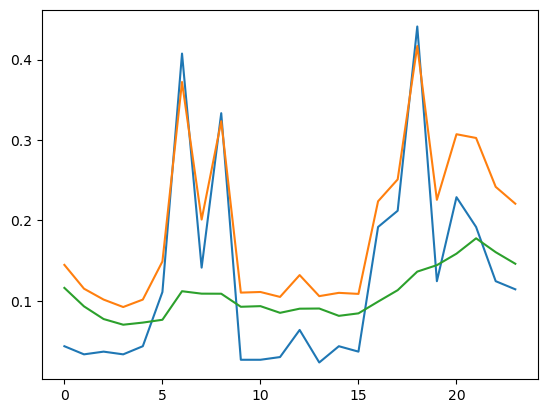

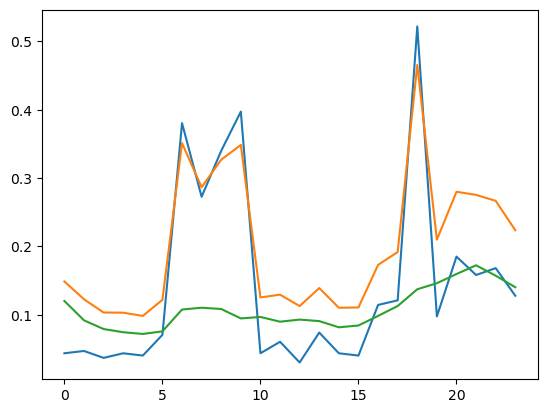

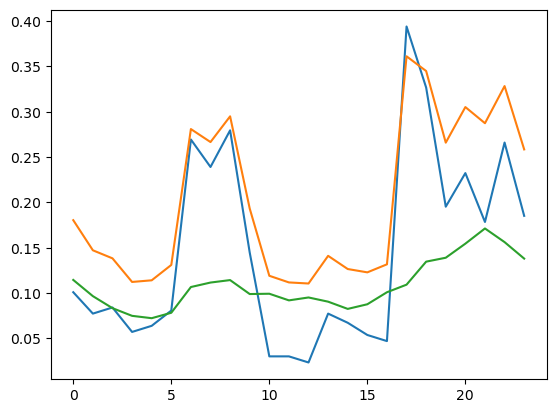

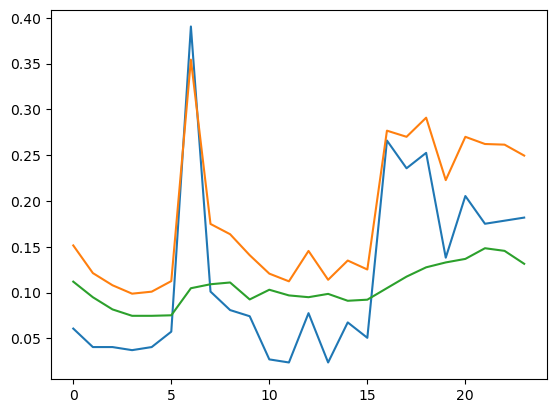

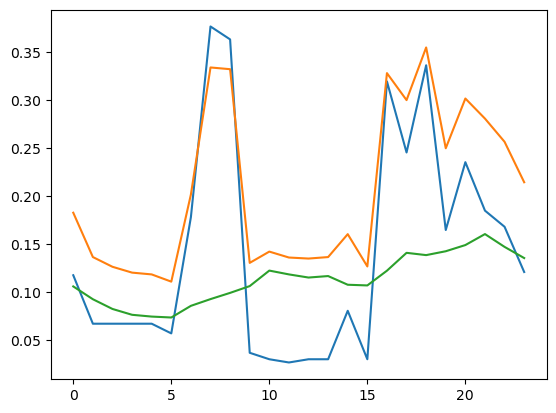

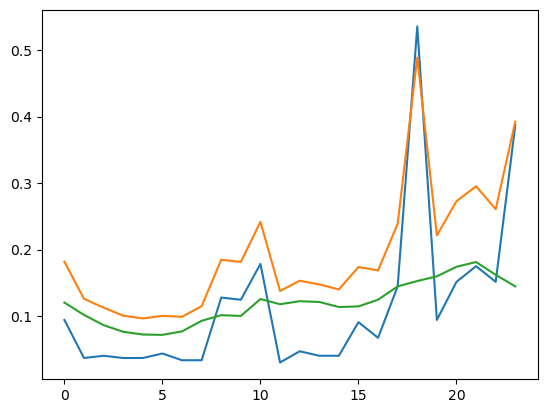

In [48]:
for i in range(0,7):
    plt.figure()
    if i ==0:
        
        
    x = [i for i in range(24)]
    y_true_show = sorted_time_splited_data[sorted_time_splited_data['day_of_week'] == i]['normalized_energy']
    y_prediction_show = sorted_time_splited_data[sorted_time_splited_data['day_of_week'] == i]['average_energy'] + sorted_time_splited_data[sorted_time_splited_data['day_of_week'] == i]['predict_energy']
    y_average = grouped_by_hour[i]
    plt.plot(x, y_true_show)
    plt.plot(x, y_prediction_show)
    plt.plot(x, y_average)